## Observations and Insights 

# Pymaceuticals Capomulin effects on Squamous Cell Carcinoma progression

* Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

![Laboratory](../Images/Laboratory.jpg)

* 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Summary of study results
* The Drug regimen of Capomulin was effective in reducing the average SCC tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely ablated.

![LineChart](../Images/LineChart.png)

* The number of data points for each Drug Regimen were all above 100 - usually statistical significance is obtained with a sample size of 30 or greater.

![BarChart](../Images/PandasBarChart.png)

* The study had a near identical number of male and female mice. Determining if sex of the mouse was correlated to efficacy would be interesting to look at.
![PieChart](../Images/PandasPieChart.png)

* Based on average final tumor volume both Capomulin and Ramicane appeared to be equally effective, but to be sure of this we would need to make sure the starting tumor volumes were equivalent. Of these four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point - the rest were "well behaved" with the datasets not having any outliers.
![BoxWhiskerPlot](../Images/BoxWhiskerPlot.png)

* Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy.
![LineChart](../Images/ScatterWeightTumorVolRegression.png)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(study_data_complete_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids_ser = study_data_complete_df.loc[study_data_complete_df.duplicated(
                                                     subset=['Mouse ID', 'Timepoint']),
                                                     'Mouse ID'].unique()

# Print unique Mouse ID which have duplicate Mouse IDs and Timepoint
for mice in range(0,len(duplicate_mouse_ids_ser)):
    print(str(duplicate_mouse_ids_ser[mice]))

g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mouse_id = study_data_complete_df[study_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
all_data_for_duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a copy of the complete data frame
clean_study_data_complete_df = study_data_complete_df

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=True)

# Display to output
clean_study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete_df["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create a data series of tumor volume with index as drug regimen
series_of_tumor_volume = pd.Series(clean_study_data_complete_df["Tumor Volume (mm3)"].tolist(),
                                          index=clean_study_data_complete_df["Drug Regimen"].tolist())

# Create groupby objects of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_series_tumor_vol_mean     = series_of_tumor_volume.groupby(level=0).mean()
grouped_series_tumor_vol_median   = series_of_tumor_volume.groupby(level=0).median()
grouped_series_tumor_vol_variance = series_of_tumor_volume.groupby(level=0).var()
grouped_series_tumor_vol_std_dev  = series_of_tumor_volume.groupby(level=0).std()
grouped_series_tumor_vol_sem      = series_of_tumor_volume.groupby(level=0).sem()

# Create a combined summary statistics table for all regimens
combined_summary_statistics_all_regimens_df = pd.concat([grouped_series_tumor_vol_mean,
                                                     grouped_series_tumor_vol_median,
                                                     grouped_series_tumor_vol_variance,
                                                     grouped_series_tumor_vol_std_dev,
                                                     grouped_series_tumor_vol_sem],
                                                     axis=1)

# Rename columns to provide meaningful names
combined_summary_statistics_all_regimens_df = combined_summary_statistics_all_regimens_df.rename(
                                                        columns={"index": "Drug Regimen",
                                                        0: "Mean of Tumor Vol (mm3)",
                                                        1: "Median of Tumor Vol (mm3)",
                                                        2: "Variance of Tumor Vol (mm3)",
                                                        3: "Standard Deviation of Tumor Vol (mm3)",
                                                        4: "SEM of Tumor Vol (mm3)"})

# Display to output
combined_summary_statistics_all_regimens_df

,Mean of Tumor Vol (mm3),Median of Tumor Vol (mm3),Variance of Tumor Vol (mm3),Standard Deviation of Tumor Vol (mm3),SEM of Tumor Vol (mm3)
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# This method produces everything in a single groupby function
grouped_summary_statistics_all_regimens_df = clean_study_data_complete_df.groupby(
                         "Drug Regimen", as_index=True).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Assign column header names as per the summary statictics and provide meaningful names
grouped_summary_statistics_all_regimens_df.columns = ["Mean of Tumor Vol (mm3)",
                                                      "Median of Tumor Vol (mm3)",
                                                      "Variance of Tumor Vol (mm3)",
                                                      "Standard Deviation of Tumor Vol (mm3)",
                                                      "SEM of Tumor Vol (mm3)"]

# Create a Summary data frame from the grouby object
summary_statistics_all_regimens_df = pd.DataFrame(grouped_summary_statistics_all_regimens_df)

# Display to output
summary_statistics_all_regimens_df

,Mean of Tumor Vol (mm3),Median of Tumor Vol (mm3),Variance of Tumor Vol (mm3),Standard Deviation of Tumor Vol (mm3),SEM of Tumor Vol (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# First create a Group by Object of total number of mice for each treatment throughout the course of the study using pandas
grouped_total_mice_all_regimens = clean_study_data_complete_df.groupby(
                         "Drug Regimen", as_index=True).agg({"Mouse ID": ["count"]})

# Assign column header names as count of Mouse ID
grouped_total_mice_all_regimens.columns = ["Total Mice"]

# Create a create a dataframe grouping by the 'Drug Regimen' column
total_mice_all_regimens_df = pd.DataFrame(grouped_total_mice_all_regimens)

# Sort and display each total number of mice for each treatment.
sorted_total_mice_all_regimens_df = total_mice_all_regimens_df.sort_values("Total Mice", ascending=False)

# Display to output
sorted_total_mice_all_regimens_df

,Total Mice
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


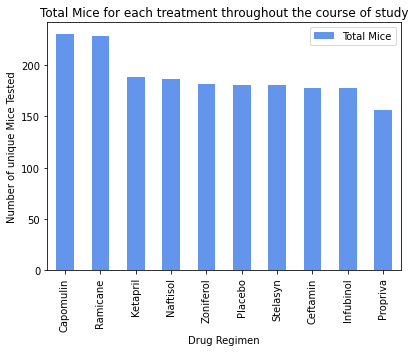

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

total_mice_bar_chart_pandas = sorted_total_mice_all_regimens_df.plot(
                                kind   = 'bar',
                                title  = "Total Mice for each treatment throughout the course of study",
                                color  = "cornflowerblue",
                                legend = True,
                                figsize=(6,5))

# Assing x-label and y-label

total_mice_bar_chart_pandas.set_xlabel("Drug Regimen")
total_mice_bar_chart_pandas.set_ylabel("Number of unique Mice Tested")

# Provide legend name
column_name = ["Total Mice"]
plt.legend(column_name, loc = "best")

plt.tight_layout()

# Save the figure
plt.savefig("../Images/PandasBarChart.png")

plt.show()

In [12]:
# First create a Group by Object of total number of mice for each treatment throughout the course of the study using pandas
grouped_total_mice_all_regimens_pyplot = clean_study_data_complete_df.groupby(
                         "Drug Regimen", as_index=False).agg({"Mouse ID": ["count"]})

# Assign column header names as count of Mouse ID
grouped_total_mice_all_regimens_pyplot.columns = ["Drug Regimen", "Total Mice"]

# Create a create a dataframe grouping by the 'Drug Regimen' column
total_mice_all_regimens_pyplot_df = pd.DataFrame(grouped_total_mice_all_regimens_pyplot)

# Sort and display each total number of mice for each treatment.
sorted_total_mice_all_regimens_pyplot_df = total_mice_all_regimens_pyplot_df.sort_values("Total Mice",
                                                                                         ascending=False)

# Hide the numerice index
sorted_total_mice_all_regimens_pyplot_hide_index_df = sorted_total_mice_all_regimens_pyplot_df.style.hide_index()

# Display formatted table without numeric index
sorted_total_mice_all_regimens_pyplot_hide_index_df

Drug Regimen,Total Mice
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,156


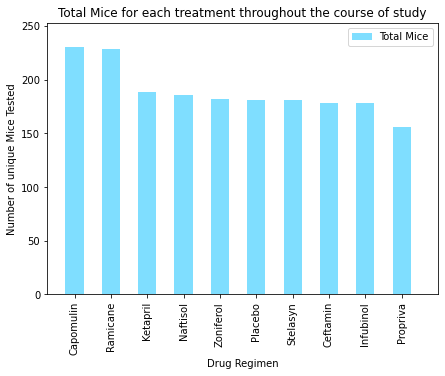

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Assign x axis and tick locations
x_axis = np.arange(len(sorted_total_mice_all_regimens_pyplot_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize = (7,5))
plt.bar(x_axis, sorted_total_mice_all_regimens_pyplot_df["Total Mice"], width = 0.5,
        color = 'deepskyblue',
        alpha = 0.5, align = "center")

plt.xticks(tick_locations, sorted_total_mice_all_regimens_pyplot_df["Drug Regimen"], rotation = "vertical")

# Assign x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(sorted_total_mice_all_regimens_df["Total Mice"])*1.10)

# Assign title, x-label, y-label
plt.title("Total Mice for each treatment throughout the course of study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique Mice Tested")

column_name = ["Total Mice"]
plt.legend(column_name, loc="best")

# Save the figure
plt.savefig("../Images/PyplotBarChart.png")
plt.show()

In [14]:
# First create a Group by Object of total number of mice for each gender
grouped_gender = clean_study_data_complete_df.groupby("Sex", as_index=True).agg({"Mouse ID": ["count"]})

# Assign column header names as count of Mouse ID
grouped_gender.columns = ["Total Mice"]

# Create a create a dataframe grouping by the 'Sex' column
grouped_gender_count_df = pd.DataFrame(grouped_gender)

# Display data frame
grouped_gender_count_df

,Total Mice
Sex,
Female,930
Male,958


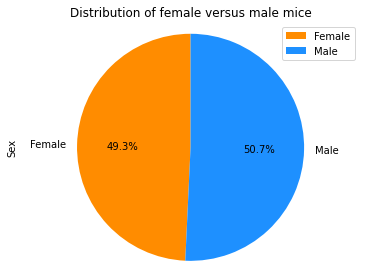

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

total_mice_pie_chart_pandas = grouped_gender_count_df["Total Mice"].plot(
                                              kind       = 'pie',
                                              title      = "Distribution of female versus male mice",
                                              startangle = 90,
                                              autopct    = '%1.1f%%',
                                              shadow     = False,
                                              colors     = ["darkorange","dodgerblue"],
                                              legend     = True,
                                              figsize=(5,4))

# Assign y label, layout, axis, save figure and show chart
total_mice_pie_chart_pandas.set_ylabel("Sex")

plt.tight_layout()

plt.axis("equal")
plt.savefig("../Images/PandasPieChart.png")
plt.show()


In [16]:
# Create a data frame of Sex and Count of Mouse ID
grouped_gender_count_pyplot_df = pd.DataFrame(grouped_gender_count_df);

# Display dataframe to output
grouped_gender_count_pyplot_df


,Total Mice
Sex,
Female,930
Male,958


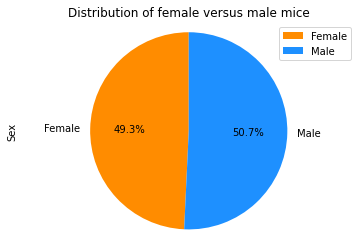

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe
gender_labels = list(grouped_gender_count_pyplot_df.index.values)

# The values of each section of the pie chart
gender_counts = grouped_gender_count_pyplot_df["Total Mice"]

# The colors of each section of the pie chart
colors = ["darkorange", "dodgerblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(6,4))
plt.pie(gender_counts,
        labels     = gender_labels,
        colors     = colors,
        autopct    = "%1.1f%%",
        shadow     = False,
        startangle = 90)

# Assign titles, y label, legend, axis, save figure and show chart

plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.legend(gender_labels, loc="best")
plt.axis("equal")

plt.savefig("../Images/PyplotPieChart.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Create a combined_data dataframe which is a subset data set where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
subset_drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
subset_drug_regimen_df = clean_study_data_complete_df[clean_study_data_complete_df["Drug Regimen"].isin(subset_drug_regimen)]

# View the newly created subset dataframe
subset_drug_regimen_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_subset_drug_regimen_tumor_volume = subset_drug_regimen_df.groupby(['Drug Regimen','Mouse ID']).agg(
# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        last_timepoint_tumor_volume = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

# Assign column header names as Last timepoint of Mean of Tumor Vol (mm3)
grouped_subset_drug_regimen_tumor_volume.columns = ["Tumor Vol (mm3) at Last timepoint"]

# View the groupby dataframe
grouped_subset_drug_regimen_tumor_volume


Tumor Vol (mm3) at Last timepoint
Drug Regimen Mouse ID                                   
Capomulin    b128                              38.982878
             b742                              38.939633
             f966                              30.485985
             g288                              37.074024
             g316                              40.159220
...                                                  ...
Ramicane     s508                              30.276232
             u196                              40.667713
             w678                              43.166373
             y449                              44.183451
             z578                              30.638696

[100 rows x 1 columns]

In [20]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_at_the_last_timepoint_df = pd.merge(
                                        subset_drug_regimen_df,
                                        grouped_subset_drug_regimen_tumor_volume,
                                             how="left", on=["Drug Regimen","Mouse ID"])

# Display to output
tumor_volume_at_the_last_timepoint_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Vol (mm3) at Last timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [21]:
# Transpose the groupby object such that Drug Regimen are columns
grouped_subset_drug_regimen_tumor_volume_transpose = grouped_subset_drug_regimen_tumor_volume.stack(level=0).unstack(level=0)

# Assign groupby object to dataframe
grouped_subset_drug_regimen_tumor_volume_transpose_df = pd.DataFrame(grouped_subset_drug_regimen_tumor_volume_transpose)

# Display to output
grouped_subset_drug_regimen_tumor_volume_transpose_df.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Tumor Vol (mm3) at Last timepoint,NaN,NaN,67.973419,NaN
a251,Tumor Vol (mm3) at Last timepoint,NaN,NaN,65.525743,NaN
a275,Tumor Vol (mm3) at Last timepoint,NaN,62.999356,NaN,NaN
a411,Tumor Vol (mm3) at Last timepoint,NaN,NaN,NaN,38.407618
a444,Tumor Vol (mm3) at Last timepoint,NaN,NaN,NaN,43.047543


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = subset_drug_regimen

# Create empty list to fill with treatment tumor vol data (for plotting)
final_tumor_vol_data = []

# Assign line to 0 which is used to only print dividing line at top of output
line = 0

# Do quartile calculations for each treatment
for treatment in treatments:
    quartiles   = grouped_subset_drug_regimen_tumor_volume_transpose_df[treatment].quantile([.25,.5,.75])
    lowerq      = quartiles[0.25]
    upperq      = quartiles[0.75]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr         = upperq - lowerq
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if line == 0:
        print(f"--------------------------------------------------------")
    print(f"{treatment} IQR data is:")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_of_mice_on_each_treatment = grouped_subset_drug_regimen_tumor_volume_transpose[treatment].dropna()
    
    # add subset 
    final_tumor_vol_data.append(tumor_vol_of_mice_on_each_treatment)
    
    print(f"--------------------Outliers-----------------------------")

    # Determine outliers using upper and lower bounds
    outliers_df = pd.DataFrame( grouped_subset_drug_regimen_tumor_volume_transpose_df[
                            (grouped_subset_drug_regimen_tumor_volume_transpose_df[treatment] < lower_bound) |
                            (grouped_subset_drug_regimen_tumor_volume_transpose_df[treatment] > upper_bound)] )
    
    # Assign outlier index to Mouse ID
    outliers_df.index = outliers_df.index.get_level_values(0)
    
    # Display outliers values
    if not outliers_df.empty:
        print(outliers_df)
    print(f"--------------------------------------------------------")
    line += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.7 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------Outliers-----------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------Outliers-----------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54

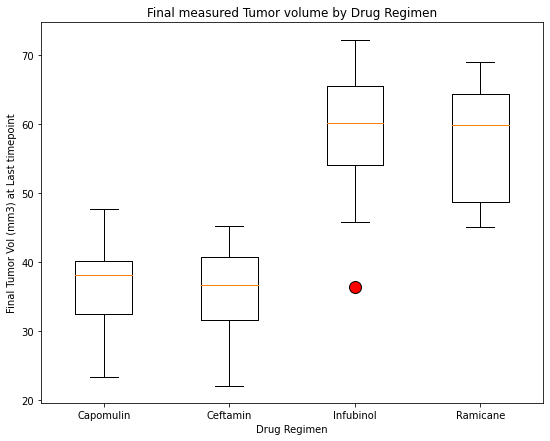

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Plot the list of lists using a boxplot and ensure the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Vol (mm3) at Last timepoint')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
ax.boxplot(final_tumor_vol_data, flierprops=flierprops)
plt.xticks([1,2,3,4],grouped_subset_drug_regimen_tumor_volume_transpose_df)

# Save the figure
plt.savefig("../Images/BoxWhiskerPlot.png")

plt.show()


## Line and Scatter Plots

In [24]:
# Create a dataframe for only the Capomulin data from clean study data frame
capomulin_df = clean_study_data_complete_df.loc[clean_study_data_complete_df["Drug Regimen"] == 'Capomulin']

# Display to output
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
# Generate a summary capomulin time point verus tumor volume of mean and SEM of the tumor volume table

# This method produces everything in a single groupby function
grouped_capomulin_time_point_vs_tumor_vol = capomulin_df.groupby(
                         "Timepoint", as_index=True).agg({"Tumor Volume (mm3)": ["mean", "sem"]})

# Assign column header names and give meaningful names
grouped_capomulin_time_point_vs_tumor_vol.columns = ["Mean of Tumor Vol (mm3)",
                                                     "SEM of Tumor Vol (mm3)"]

# Create a data frame from the grouby object
capomulin_time_point_vs_tumor_vol_df = pd.DataFrame(grouped_capomulin_time_point_vs_tumor_vol)

# Display to output
capomulin_time_point_vs_tumor_vol_df

,Mean of Tumor Vol (mm3),SEM of Tumor Vol (mm3)
Timepoint,,
0,45.000000,0.000000
5,44.266086,0.448593
10,43.084291,0.702684
15,42.064317,0.838617
20,40.716325,0.909731
25,39.939528,0.881642
30,38.769339,0.934460
35,37.816839,1.052241
40,36.958001,1.223608


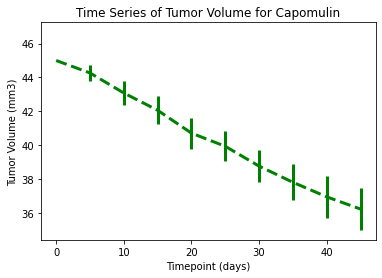

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# create a list of time point values for the x axis
time_point_series = list(capomulin_time_point_vs_tumor_vol_df.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_point_series,  # X values
    capomulin_time_point_vs_tumor_vol_df['Mean of Tumor Vol (mm3)'], # Y values
    yerr=capomulin_time_point_vs_tumor_vol_df['SEM of Tumor Vol (mm3)'], # Y errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="g--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Assign titles, y label, title
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Assign x and y limits 
plt.xlim(min(time_point_series)-max(time_point_series)*0.05, max(time_point_series)*1.05)
plt.ylim(min(capomulin_time_point_vs_tumor_vol_df['Mean of Tumor Vol (mm3)'])*0.95,
         max(capomulin_time_point_vs_tumor_vol_df['Mean of Tumor Vol (mm3)'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
plt.savefig("../Images/LineChart.png")

# Show chart
plt.show()

In [27]:
# Display Capomulin regimen dataframe
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [28]:
# Groupby Mouse ID using this method produces everything in a single groupby function
# and get the weight and mean of tumor volume
grouped_capomulin_mouse_vs_weight_and_tumor_vol = capomulin_df.groupby(
                         "Mouse ID", as_index=True).agg({"Weight (g)": ["mean"], # use mean since each mouse as same weight on each mouse row
                                                         "Tumor Volume (mm3)": ["mean"]})

# Assign column header names and give meaningful names
grouped_capomulin_mouse_vs_weight_and_tumor_vol.columns = ["Weight (g)",
                                                           "Mean of Tumor Vol (mm3)"]

# Create a data frame from the grouby object
capomulin_mouse_vs_weight_and_tumor_vol_df = pd.DataFrame(grouped_capomulin_mouse_vs_weight_and_tumor_vol)

# Display to output
capomulin_mouse_vs_weight_and_tumor_vol_df.head()

,Weight (g),Mean of Tumor Vol (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


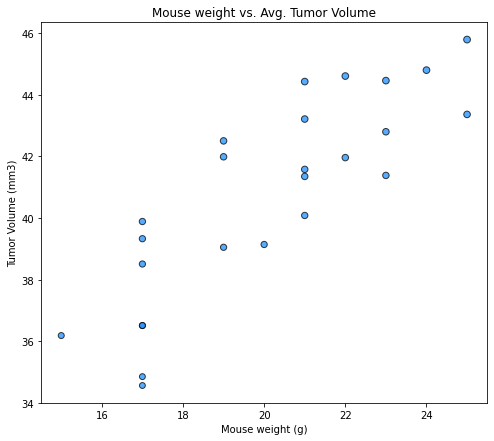

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(
    capomulin_mouse_vs_weight_and_tumor_vol_df["Weight (g)"],
    capomulin_mouse_vs_weight_and_tumor_vol_df["Mean of Tumor Vol (mm3)"],
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    s=capomulin_mouse_vs_weight_and_tumor_vol_df["Mean of Tumor Vol (mm3)"],
    alpha=.75)

# Assign title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig("../Images/ScatterWeightTumorVol.png")

plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_mouse_vs_weight_and_tumor_vol_df["Weight (g)"],
                          capomulin_mouse_vs_weight_and_tumor_vol_df["Mean of Tumor Vol (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


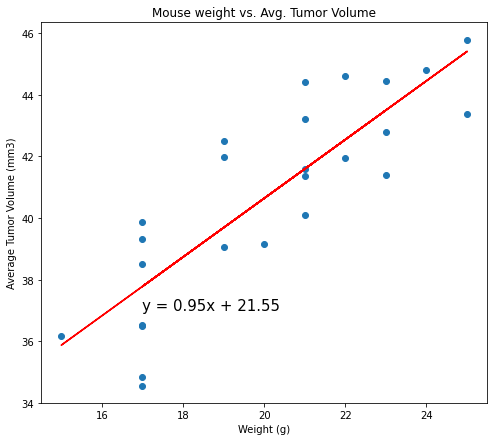

In [31]:
# Assign x_values, y_valuesPrint out the r-squared value along with the plot.
x_values = capomulin_mouse_vs_weight_and_tumor_vol_df["Weight (g)"]
y_values = capomulin_mouse_vs_weight_and_tumor_vol_df["Mean of Tumor Vol (mm3)"]

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (17,37), fontsize=15, color="black")

# Plot title
plt.title("Mouse weight vs. Avg. Tumor Volume")

# Plot x-label and y-label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Print r-squared value
print(f"The r-squared is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("../Images/ScatterWeightTumorVolRegression.png")

plt.show()